In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pytz import timezone
import pytz
import json
import networkx as nx
import matplotlib as pylab

In [2]:
df=pd.read_csv("../data/CometLanding.csv", 
                dtype={"id_str": str, "in_reply_to_user_id_str": str, "from_user_id_str": str,
                        "in_reply_to_status_id_str": str, "user_followers_count": "Int64",
                        "user_friends_count": "Int64", "geo_coordinates" : str}, parse_dates=['created_at']
              )

In [20]:
raw = df

In [ ]:
df = raw

In [86]:
df

,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str
0,540930409279008768,amika0078788556,RT @VersaTechnology: Congratulations @Philae20...,2014-12-05 18:07:14+00:00,NaN,en,NaN,NaN,1297570116,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3555068293...,425,113,http://twitter.com/amika0078788556/statuses/54...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56..."
1,540930042700656640,ChrisDMarshall,CometWatch 2 December Â» Rosetta - ESA's comet...,2014-12-05 18:05:46+00:00,NaN,en,NaN,NaN,42201214,NaN,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",http://pbs.twimg.com/profile_images/228087980/...,347,1286,http://twitter.com/ChrisDMarshall/statuses/540...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
2,540929998388211713,MHuuskoL,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:05:36+00:00,NaN,en,NaN,NaN,574434762,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4973510588...,215,310,http://twitter.com/MHuuskoL/statuses/540929998...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
3,540929346878599168,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:03:00+00:00,NaN,fr,NaN,NaN,1057356487,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5391705804...,741,310,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
4,540929229052203008,CBCDay6,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 18:02:32+00:00,NaN,en,NaN,NaN,177276897,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/4590694303...,4331,2098,http://twitter.com/CBCDay6/statuses/5409292290...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77302,532460149084930049,ABForScience,This means that the actual landing will be ar...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,2333122519,NaN,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/4320695593...,155,212,http://twitter.com/ABForScience/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
77303,532460148451581952,atieyK,RT @ObservingSpace: Weâ€™ve been waiting 10 ye...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,58303715,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5057311637...,354,1088,http://twitter.com/atieyK/statuses/53246014845...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":..."
77304,532460148254470144,j0nny5,RT @maxplanckpress: Accomazzo (flight director...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,17914863,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/89991673/j...,92,63,http://twitter.com/j0nny5/statuses/53246014825...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
77305,532460148238090240,nsentse,7 hours of waiting #CometLanding,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,20434005,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3693655850...,200,267,http://twitter.com/nsentse/statuses/5324601482...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."


In [84]:
len(df)

77309

In [25]:
df.dtypes

id_str                                    object
from_user                                 object
text                                      object
created_at                   datetime64[ns, UTC]
geo_coordinates                           object
user_lang                                 object
in_reply_to_user_id_str                   object
in_reply_to_screen_name                   object
from_user_id_str                          object
in_reply_to_status_id_str                 object
source                                    object
profile_image_url                         object
user_followers_count                       Int64
user_friends_count                         Int64
status_url                                object
entities_str                              object
dtype: object

In [21]:
filter_data(df)

In [22]:
refine_id(df)

In [79]:
df = df.append(df.loc[0], ignore_index=True)

In [30]:
df.at[77307, 'entities_str'] = df.at[77307, 'entities_str'].replace("CometLanding", "Comet")

In [82]:
df.at[77308, 'created_at'] = datetime.datetime.now()

In [31]:
df.at[77307, 'entities_str']

'{"hashtags":[{"text":"Philae","indices":[49,56]},{"text":"Comet","indices":[139,140]}],"symbols":[],"user_mentions":[{"screen_name":"VersaTechnology","name":"Versa Technology","id":30264992,"id_str":"30264992","indices":[3,19]},{"screen_name":"Philae2014","name":"Philae Lander","id":208442526,"id_str":"208442526","indices":[37,48]}],"urls":[{"url":"http://t.co/6SoGeZTS9N","expanded_url":"http://cnn.it/1qDQu0s","display_url":"cnn.it/1qDQu0s","indices":[139,140]}]}'

In [33]:
df.drop(df[~(df['entities_str'].str.contains("cometlanding", case=False))].index, inplace=True)

In [53]:
date = pd.to_datetime(df['created_at'].loc[0])

In [55]:
start_date = datetime.datetime(2014,11,12)
start_date = timezone('GMT-0').localize(start_date)
start_date < date

True

In [85]:
start_date = datetime.datetime(2014,11,12)
start_date = timezone('GMT-0').localize(start_date)
end_date = datetime.datetime(2014,12,6)
end_date = timezone('GMT-0').localize(end_date)
# mask = (df['created_at'] >= start_date) & (df['created_at'] < end_date)
# df.drop(df[df[pd.to_datetime(df['created_at'], utc=True) < start_date]])
to_drop = df[(pd.to_datetime(df['created_at'], utc=True) < start_date) 
             | (pd.to_datetime(df['created_at'], utc=True) >= end_date)]
df.drop(df[(pd.to_datetime(df['created_at'], utc=True) < start_date) 
             | (pd.to_datetime(df['created_at'], utc=True) >= end_date)].index, inplace=True)

In [16]:
dropped = df.drop_duplicates()

In [31]:
ids = dropped.id_str.duplicated(keep=False)

In [32]:
ids

0        False
1        False
2        False
3        False
4        False
         ...  
77314    False
77315    False
77316    False
77317    False
77318    False
Name: id_str, Length: 77309, dtype: bool

In [33]:
ids[ids]

395      True
396      True
6481     True
6482     True
18080    True
         ... 
72416    True
74168    True
74169    True
75002    True
75003    True
Name: id_str, Length: 82, dtype: bool

In [34]:
dropped.loc[395]

id_str                                                      540156649567436000
from_user                                                         RosettaMIDAS
text                         RT @ESA_Rosetta: Moving back towards a 20 km o...
created_at                                           2014-12-03 14:52:35+00:00
time                                                          03/12/2014 14:52
geo_coordinates                                                            NaN
user_lang                                                                   en
in_reply_to_user_id_str                                                    NaN
in_reply_to_screen_name                                                    NaN
from_user_id_str                                                     523340129
in_reply_to_status_id_str                                                  NaN
source                       <a href="https://about.twitter.com/products/tw...
profile_image_url            http://pbs.twimg.com/pr

In [43]:
check = dropped[dropped['id_str'] == '540156649567436000']

In [45]:
check.loc[:,"text"]

395    RT @ESA_Rosetta: Moving back towards a 20 km o...
396    RT @ESA_Rosetta: Moving back towards a 20 km o...
Name: text, dtype: object

In [49]:
text1 = check.iloc[0]["text"]

In [50]:
text1

'RT @ESA_Rosetta: Moving back towards a 20 km orbit around #67P. Visualisation of my trajectory Oct-Dec: http://t.co/Z2A14Jorv6 #CometWatch â€¦'

In [51]:
text2 = check.iloc[1]['text']

In [52]:
text2

'RT @ESA_Rosetta: Moving back towards a 20 km orbit around #67P. Visualisation of my trajectory Oct-Dec: http://t.co/Z2A14Jorv6 #CometWatch â€¦'

In [53]:
check

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str
395,540156649567436000,RosettaMIDAS,RT @ESA_Rosetta: Moving back towards a 20 km o...,2014-12-03 14:52:35+00:00,03/12/2014 14:52,NaN,en,NaN,NaN,523340129,NaN,"<a href=""https://about.twitter.com/products/tw...",http://pbs.twimg.com/profile_images/1894141488...,4891,20,http://twitter.com/RosettaMIDAS/statuses/54015...,"{""hashtags"":[{""text"":""67P"",""indices"":[58,62]},..."
396,540156649567436000,msbentley,RT @ESA_Rosetta: Moving back towards a 20 km o...,2014-12-03 14:52:35+00:00,03/12/2014 14:52,NaN,en,NaN,NaN,10408632,NaN,"<a href=""https://about.twitter.com/products/tw...",http://pbs.twimg.com/profile_images/3698761995...,1387,704,http://twitter.com/msbentley/statuses/54015664...,"{""hashtags"":[{""text"":""67P"",""indices"":[58,62]},..."


In [54]:
same_ids = ids[ids].index

In [55]:
same_ids

Int64Index([  395,   396,  6481,  6482, 18080, 18081, 20554, 20555, 22068,
            22069, 22747, 22748, 25103, 25104, 25592, 25593, 25948, 25949,
            27433, 27434, 28009, 28010, 28236, 28237, 28309, 28310, 31533,
            31534, 31955, 31956, 32563, 32564, 32616, 32617, 32673, 32674,
            32693, 32694, 33043, 33044, 33656, 33657, 33806, 33807, 33916,
            33917, 33946, 33947, 34438, 34439, 34712, 34713, 35089, 35090,
            35101, 35102, 35359, 35360, 35528, 35529, 36006, 36007, 36230,
            36231, 37031, 37032, 39825, 39826, 40387, 40388, 42565, 42566,
            55610, 55611, 64053, 64054, 72415, 72416, 74168, 74169, 75002,
            75003],
           dtype='int64')

In [57]:
dropped.loc[0]

id_str                                                      540930409279008000
from_user                                                      amika0078788556
text                         RT @VersaTechnology: Congratulations @Philae20...
created_at                                           2014-12-05 18:07:14+00:00
time                                                          05/12/2014 18:07
geo_coordinates                                                            NaN
user_lang                                                                   en
in_reply_to_user_id_str                                                    NaN
in_reply_to_screen_name                                                    NaN
from_user_id_str                                                    1297570116
in_reply_to_status_id_str                                                  NaN
source                       <a href="http://twitter.com" rel="nofollow">Tw...
profile_image_url            http://pbs.twimg.com/pr

In [61]:
dropped.loc[same_ids]

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str
395,540156649567436000,RosettaMIDAS,RT @ESA_Rosetta: Moving back towards a 20 km o...,2014-12-03 14:52:35+00:00,03/12/2014 14:52,NaN,en,NaN,NaN,523340129,NaN,"<a href=""https://about.twitter.com/products/tw...",http://pbs.twimg.com/profile_images/1894141488...,4891,20,http://twitter.com/RosettaMIDAS/statuses/54015...,"{""hashtags"":[{""text"":""67P"",""indices"":[58,62]},..."
396,540156649567436000,msbentley,RT @ESA_Rosetta: Moving back towards a 20 km o...,2014-12-03 14:52:35+00:00,03/12/2014 14:52,NaN,en,NaN,NaN,10408632,NaN,"<a href=""https://about.twitter.com/products/tw...",http://pbs.twimg.com/profile_images/3698761995...,1387,704,http://twitter.com/msbentley/statuses/54015664...,"{""hashtags"":[{""text"":""67P"",""indices"":[58,62]},..."
6481,532667596664213000,gary_j_wood,RT @ClarkHat: Awesome. RT @dcas1978: A bit of ...,2014-11-12 22:53:46+00:00,12/11/2014 22:53,NaN,en,NaN,NaN,244935285,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/4424232984...,155,269,http://twitter.com/gary_j_wood/statuses/532667...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
6482,532667596664213000,WhatayaNuts,"Hey, glad we're not the only ones wondering! #...",2014-11-12 22:53:46+00:00,12/11/2014 22:53,NaN,en,NaN,NaN,110812952,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">...",http://pbs.twimg.com/profile_images/3189840928...,566,1534,http://twitter.com/WhatayaNuts/statuses/532667...,"{""hashtags"":[{""text"":""whatayanuts"",""indices"":[..."
18080,532609776531030000,andyjones1066,RT @Howard_Goodall: On this day 100 yrs ago Eu...,2014-11-12 19:04:00+00:00,12/11/2014 19:04,NaN,en,NaN,NaN,247319826,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/1718319303...,44,188,http://twitter.com/andyjones1066/statuses/5326...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72416,532464173121568000,RBHamilton1,RT @esa: '@Philae2014 is gone - it's on its pa...,2014-11-12 09:25:26+00:00,12/11/2014 09:25,NaN,en,NaN,NaN,802057369,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/2726936551...,970,1899,http://twitter.com/RBHamilton1/statuses/532464...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
74168,532462139035095000,Rutinatate,RT @Sondas: Â¡SEPARACIÃ“N! La ESA confirma que...,2014-11-12 09:17:21+00:00,12/11/2014 09:17,NaN,es,NaN,NaN,1632839912,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/3788000002...,187,412,http://twitter.com/Rutinatate/statuses/5324621...,"{""hashtags"":[{""text"":""Philae"",""indices"":[45,52..."
74169,532462139035095000,Ludwig_Prandtl,"RT @Danny_2462: Really, rosetta is just a glor...",2014-11-12 09:17:21+00:00,12/11/2014 09:17,NaN,en,NaN,NaN,1971516859,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3788000006...,188,270,http://twitter.com/Ludwig_Prandtl/statuses/532...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
75002,532461460077953000,martyjw,RT @Philae_MUPUS: Philae just jettisoned the R...,2014-11-12 09:14:39+00:00,12/11/2014 09:14,NaN,en,NaN,NaN,13299752,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/3467519584...,390,600,http://twitter.com/martyjw/statuses/5324614600...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":..."


In [67]:
def isTwitter(url):
    tw_url = "http://twitter\.com"
    match = re.search(tw_url, url)
    if match != None:
        print("Twitter url: " + url)
        return True
    else:
        print("Not twitter? : " + url)
        return False

In [73]:
fst = dropped.head(20)

In [5]:
fst

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str
0,540930409279008000,amika0078788556,RT @VersaTechnology: Congratulations @Philae20...,2014-12-05 18:07:14+00:00,05/12/2014 18:07,NaN,en,NaN,NaN,1297570116,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3555068293...,425,113,http://twitter.com/amika0078788556/statuses/54...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56..."
1,540930042700656000,ChrisDMarshall,CometWatch 2 December Â» Rosetta - ESA's comet...,2014-12-05 18:05:46+00:00,05/12/2014 18:05,NaN,en,NaN,NaN,42201214,NaN,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",http://pbs.twimg.com/profile_images/228087980/...,347,1286,http://twitter.com/ChrisDMarshall/statuses/540...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
2,540929998388211000,MHuuskoL,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:05:36+00:00,05/12/2014 18:05,NaN,en,NaN,NaN,574434762,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4973510588...,215,310,http://twitter.com/MHuuskoL/statuses/540929998...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
3,540929346878599000,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:03:00+00:00,05/12/2014 18:03,NaN,fr,NaN,NaN,1057356487,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5391705804...,741,310,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
4,540929229052203000,CBCDay6,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 18:02:32+00:00,05/12/2014 18:02,NaN,en,NaN,NaN,177276897,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/4590694303...,4331,2098,http://twitter.com/CBCDay6/statuses/5409292290...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices..."
5,540928707947671000,MBernacconi,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:00:28+00:00,05/12/2014 18:00,NaN,en,NaN,NaN,47907492,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/5331943059...,317,478,http://twitter.com/MBernacconi/statuses/540928...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
6,540928513906589000,LukeGolds,USA Â» NEWS Â» HOT NEWS 828 comet landing Phi...,2014-12-05 17:59:42+00:00,05/12/2014 17:59,NaN,en,NaN,NaN,619629656,NaN,"<a href=""http://ifttt.com"" rel=""nofollow"">IFTT...",http://pbs.twimg.com/profile_images/2344739619...,350,<NA>,http://twitter.com/LukeGolds/statuses/54092851...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":..."
7,540926888768966000,markcritch,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 17:53:14+00:00,05/12/2014 17:53,NaN,en,NaN,NaN,24618825,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/4204092788...,41655,745,http://twitter.com/markcritch/statuses/5409268...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices..."
8,540926211594416000,vencivelev,RT @VersaTechnology: Congratulations @Philae20...,2014-12-05 17:50:33+00:00,05/12/2014 17:50,NaN,en,NaN,NaN,1386198180,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3611682679...,214,106,http://twitter.com/vencivelev/statuses/5409262...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56..."
9,540925590111789000,shaunmajumder,Feels good to be the @CBCDay6 champion beating...,2014-12-05 17:48:05+00:00,05/12/2014 17:48,NaN,en,NaN,NaN,17680518,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1312790905...,67013,1973,http://twitter.com/shaunmajumder/statuses/5409...,"{""hashtags"":[{""text"":""Mi

In [68]:
isTwitter("http://twitter.com/download/iphone")

Twitter url: http://twitter.com/download/iphone


True

In [69]:
isTwitter("http://instagram.com")

Not twitter? : http://instagram.com


False

In [9]:
fst['source'].values

array(['<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://dev.twitter.com/docs/tfw" rel="nofollow">Twitter for Websites</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://ifttt.com" rel="nofollow">IFTTT</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://ifttt.com" rel="nofollow">IFTTT</a>',
       '<

In [64]:
dropped[dropped['from_user_id_str'] == "764567449"]['source'].values

array(['<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'],
      dtype=object)

In [76]:
def isInstagram(url):
    match = re.search("instagram", url)
    return match != None

In [80]:
re.search("[^(instagram)]", "http://instagram.com") != None

True

In [83]:
re.search("[^(instagram)]", "http://twitter.com") != None

True

In [74]:
fst['status_url'].values

array(['http://twitter.com/amika0078788556/statuses/540930409279008768',
       'http://twitter.com/ChrisDMarshall/statuses/540930042700656640',
       'http://twitter.com/MHuuskoL/statuses/540929998388211713',
       'http://twitter.com/SaraGomezAranci/statuses/540929346878599168',
       'http://twitter.com/CBCDay6/statuses/540929229052203008',
       'http://twitter.com/MBernacconi/statuses/540928707947671555',
       'http://twitter.com/LukeGolds/statuses/540928513906589696',
       'http://twitter.com/markcritch/statuses/540926888768966656',
       'http://twitter.com/vencivelev/statuses/540926211594416128',
       'http://twitter.com/shaunmajumder/statuses/540925590111789056',
       'http://twitter.com/EUCouncil/statuses/540925056533413888',
       'http://twitter.com/LukeGolds/statuses/540924908797448193',
       'http://twitter.com/Kristenpanz/statuses/540923325061808128',
       'http://twitter.com/TerryMcCracken/statuses/540922477552369664',
       'http://twitter.com/MONIKA

In [15]:
ip = fst.source.str.contains('iphone')
iphone_index = ip[ip].index

In [16]:
iphone_index

Int64Index([3, 7, 9, 12, 19], dtype='int64')

In [18]:
fst.loc[iphone_index]

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str
3,540929346878599000,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:03:00+00:00,05/12/2014 18:03,NaN,fr,NaN,NaN,1057356487,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5391705804...,741,310,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
7,540926888768966000,markcritch,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 17:53:14+00:00,05/12/2014 17:53,NaN,en,NaN,NaN,24618825,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/4204092788...,41655,745,http://twitter.com/markcritch/statuses/5409268...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices..."
9,540925590111789000,shaunmajumder,Feels good to be the @CBCDay6 champion beating...,2014-12-05 17:48:05+00:00,05/12/2014 17:48,NaN,en,NaN,NaN,17680518,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1312790905...,67013,1973,http://twitter.com/shaunmajumder/statuses/5409...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices..."
12,540923325061808000,Kristenpanz,RT @costumepups: #CometLanding http://t.co/7Rj...,2014-12-05 17:39:05+00:00,05/12/2014 17:39,NaN,en,NaN,NaN,1494498900,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5376286278...,401,469,http://twitter.com/Kristenpanz/statuses/540923...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
19,540907079557320000,JohnVuster,RT @costumepups: #CometLanding http://t.co/7Rj...,2014-12-05 16:34:31+00:00,05/12/2014 16:34,NaN,en,NaN,NaN,2434638772,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5396355433...,187,70,http://twitter.com/JohnVuster/statuses/5409070...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."


In [6]:
def countIphone(df):
    ser = df.source.str.contains('iphone')
    return ser[ser == True].size

In [7]:
countIphone(fst)

5

In [28]:
countIphone(dropped)

13750

In [12]:
dropped[dropped['from_user_id_str'].isna()]

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str
19363,532609094092603000,Gemjacks,RT @NASAJPL: See @Philae2014's view on the way...,2014-11-12 19:01:18+00:00,12/11/2014 19:01,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN
19364,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN


In [36]:
renamed = dropped.rename({'id_str': 'Tweet ID', 'from_user': 'User', 'text': 'Text', "created_at": 'Created at',
                          'time': 'Time', 'geo_coordinates': "Geo coordinates", 'user_lang': 'User language',
                          'in_reply_to_user_id_str': 'Reply ID', "in_reply_to_screen_name": 'Reply Screen Name',
                          'from_user_id_str': 'User ID', 'in_reply_to_status_id_str': 'Reply Status ID', 
                          'source': 'Source', 'profile_image_url': 'Profile image URL', 
                          'user_followers_count': 'User Followers No.', 'user_friends_count': 'User Friends No.',
                          'status_url': 'Status URL', 'entities_str': 'Entities'}
                         , axis='columns')

In [37]:
renamed

,Tweet ID,User,Text,Created at,Time,Geo coordinates,User language,Reply ID,Reply Screen Name,User ID,Reply Status ID,Source,Profile image URL,User Followers No.,User Friends No.,Status URL,Entities
0,540930409279008000,amika0078788556,RT @VersaTechnology: Congratulations @Philae20...,2014-12-05 18:07:14+00:00,05/12/2014 18:07,NaN,en,NaN,NaN,1297570116,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3555068293...,425,113,http://twitter.com/amika0078788556/statuses/54...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56..."
1,540930042700656000,ChrisDMarshall,CometWatch 2 December Â» Rosetta - ESA's comet...,2014-12-05 18:05:46+00:00,05/12/2014 18:05,NaN,en,NaN,NaN,42201214,NaN,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",http://pbs.twimg.com/profile_images/228087980/...,347,1286,http://twitter.com/ChrisDMarshall/statuses/540...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
2,540929998388211000,MHuuskoL,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:05:36+00:00,05/12/2014 18:05,NaN,en,NaN,NaN,574434762,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4973510588...,215,310,http://twitter.com/MHuuskoL/statuses/540929998...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
3,540929346878599000,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:03:00+00:00,05/12/2014 18:03,NaN,fr,NaN,NaN,1057356487,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5391705804...,741,310,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
4,540929229052203000,CBCDay6,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 18:02:32+00:00,05/12/2014 18:02,NaN,en,NaN,NaN,177276897,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/4590694303...,4331,2098,http://twitter.com/CBCDay6/statuses/5409292290...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77314,532460149084930000,ABForScience,This means that the actual landing will be ar...,2014-11-12 09:09:26+00:00,12/11/2014 09:09,NaN,en,NaN,NaN,2333122519,NaN,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/4320695593...,155,212,http://twitter.com/ABForScience/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
77315,532460148451581000,atieyK,RT @ObservingSpace: Weâ€™ve been waiting 10 ye...,2014-11-12 09:09:26+00:00,12/11/2014 09:09,NaN,en,NaN,NaN,58303715,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5057311637...,354,1088,http://twitter.com/atieyK/statuses/53246014845...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":..."
77316,532460148254470000,j0nny5,RT @maxplanckpress: Accomazzo (flight director...,2014-11-12 09:09:26+00:00,12/11/2014 09:09,NaN,en,NaN,NaN,17914863,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/89991673/j...,92,63,http://twitter.com/j0nny5/statuses/53246014825...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
77317,532460148238090000,nsentse,7 hours of waiting #CometLanding,2014-11-12 09:09:26+00:00,12/11/2014 09:09,NaN,en,NaN,NaN,20434005,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3693655850...,200,267,http://twitter.com/nsentse/statuses/5324601482...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."


In [44]:
newCol = fst

In [45]:
newCol['device']=newCol['source'].apply(lambda x: findDevice(str(x)))

C:\Users\msmai\AppData\Local\Temp/ipykernel_20552/3635512660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newCol['device']=newCol['source'].apply(lambda x: findDevice(str(x)))


In [31]:
ids = set(dropped['from_user_id_str'])

In [32]:
len(ids)

50217

In [34]:
ids = {id for id in ids if pd.notna(id)}

In [35]:
len(ids)

50216

In [56]:
def processUserDevice(row, ds):
    dev = row['device']
    user = row['from_user_id_str']
    if dev != 'Unknown':
        curDev = ds.setdefault(user, set())
        curDev.add(dev)
        ds.update({user: curDev})        

def countDevices(df):
    ds = dict()
    df.apply(lambda row: processUserDevice(row, ds), axis = 1)
    return ds

In [57]:
test = dict()
processUserDevice(newCol.loc[3], test)

In [58]:
test

{'1057356487': {'IOS'}}

In [59]:
countDevices(newCol)

{'574434762': {'IOS'},
 '1057356487': {'IOS'},
 '177276897': {'Android'},
 '24618825': {'IOS'},
 '17680518': {'IOS'},
 '1494498900': {'IOS'},
 '104455695': {'IOS'},
 '1352803274': {'Android'},
 '2434638772': {'IOS'}}

In [6]:
def getDevice(row, ds):
    user = row['from_user_id_str']
    src = row['source']
    dev = findDevice(row['source'])
    if dev != 'Unknown':
        curDev = ds.setdefault(user, set())
        curDev.add(dev)
        ds.update({user: curDev})

# return a dictionary of user ids with a set of devices used by that user
def ctDevices(df):
    ds = dict()
    df.apply(lambda row: getDevice(row, ds), axis = 1)
    return ds

In [82]:
devices = ctDevices(dropped)

In [32]:
print("IOS:", len([x for x in devices.values() if x == {"IOS"}]),
      "\nAndroid:", len([x for x in devices.values() if x == {"Android"}]),
      "\nBoth:", len([x for x in devices.values() if x == {"IOS", "Android"}]),
      "\nTotal:", len(devices.values()),
      "\nTotal users:", len({x for x in set(dropped['from_user_id_str']) if pd.notna(x)})
     )

IOS: 12460 
Android: 9642 
Both: 35 
Total: 22137 
Total users: 50216


In [70]:
def devicesChart(df):
    devices = ctDevices(df).values()
    ios = len([x for x in devices if x == {"IOS"}])
    android = len([x for x in devices if x == {"Android"}])
    both = len([x for x in devices if x == {"IOS", "Android"}])
    total = len({x for x in set(dropped['from_user_id_str']) if pd.notna(x)})
    unknown = total - len(devices)
    dev_num = np.array([ios, android, both, unknown])
    dev_labels = [f"IOS only: {ios} ({round(ios/total*100, 2)}%)", 
                  f"Android only: {android} ({round(android/total*100, 2)}%)", 
                  f"Both IOS and Android: {both} ({round(both/total*100, 2)}%)", 
                  f"Unknown: {unknown} ({round(unknown/total*100, 2)}%)"]
    # https://stackoverflow.com/questions/19852215/how-to-add-a-legend-to-matplotlib-pie-chart
    patches, texts = plt.pie(dev_num)
    plt.legend(patches, dev_labels, loc="lower left")
    plt.show()

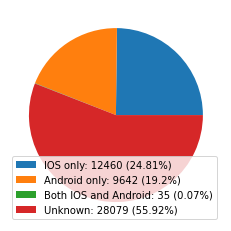

In [71]:
devicesChart(dropped)

In [52]:
def showChart(devices):
    ios = len([x for x in devices.values() if x == {"IOS"}])
    android = len([x for x in devices.values() if x == {"Android"}])
    both = len([x for x in devices.values() if x == {"IOS", "Android"}])
    unknown = len({x for x in set(dropped['from_user_id_str']) if pd.notna(x)}) - len(devices)
    dev_num = np.array([ios, android, both, unknown])
    dev_labels = ["IOS only", "Android only", "Both IOS and Android", "Unknown"]
    # https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
        return my_autopct
    plt.pie(dev_num, labels = dev_labels, autopct=make_autopct(dev_num))
    plt.show()

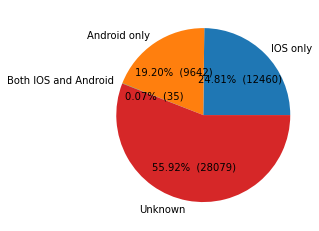

In [53]:
showChart(devices)

In [79]:
def devChart(devices):
    ios = len([x for x in devices.values() if x == {"IOS"}])
    android = len([x for x in devices.values() if x == {"Android"}])
    both = len([x for x in devices.values() if x == {"IOS", "Android"}])
    total = len({x for x in set(df['from_user_id_str']) if pd.notna(x)})
    unknown = total - len(devices)
    dev_num = np.array([ios, android, both, unknown])
    dev_labels = [f"IOS only: {ios} ({round(ios/total*100, 2)}%)", 
                  f"Android only: {android} ({round(android/total*100, 2)}%)", 
                  f"Both IOS and Android: {both} ({round(both/total*100, 2)}%)", 
                  f"Unknown: {unknown} ({round(unknown/total*100, 2)}%)"]
    # https://stackoverflow.com/questions/19852215/how-to-add-a-legend-to-matplotlib-pie-chart
    patches, texts = plt.pie(dev_num)
    plt.legend(patches, dev_labels, loc="lower left")
    plt.show()

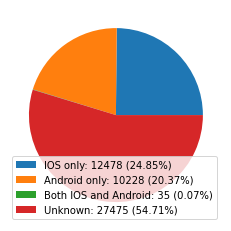

In [80]:
devChart(devices)

In [74]:
def findDevice(src):
    if (pd.isna(src)):
        return "Unknown"
    elif (re.search('firefox', src, re.IGNORECASE) != None):
        return "Firefox OS"
    elif (re.search('windows', src, re.IGNORECASE) != None):
        return "Windows"
    elif (re.search('chrome', src, re.IGNORECASE) != None):
        return "Chrome (?)"
    elif (re.search('iphone', src, re.IGNORECASE) != None):
        return "IOS"
    elif (re.search('ipad', src, re.IGNORECASE) != None):
        return "IOS"
    elif (re.search('ios', src, re.IGNORECASE) != None):
        return "IOS"
    elif (re.search('itunes', src, re.IGNORECASE) != None):
        return "IOS"
    elif (re.search('mac', src, re.IGNORECASE) != None):
        return "IOS"
    elif (re.search('android', src, re.IGNORECASE) != None):
        return "Android"
    elif (re.search('blackberry', src, re.IGNORECASE) != None):
        return "Black Berry"
    else :
        return "Unknown"

In [75]:
dropped['device']=dropped['source'].apply(lambda x: findDevice(str(x)))

C:\Users\msmai\AppData\Local\Temp/ipykernel_16100/2277939395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped['device']=dropped['source'].apply(lambda x: findDevice(str(x)))


In [41]:
set(dropped[dropped['device'] == "IOS"]['source'].values)

{'<a href="http://covelline.com/feather/" rel="nofollow">feather for iOS</a>',
 '<a href="http://janetter.net/" rel="nofollow">Janetter Pro for iPad</a>',
 '<a href="http://janetter.net/" rel="nofollow">Janetter Pro for iPhone</a>',
 '<a href="http://janetter.net/" rel="nofollow">Janetter for iPhone</a>',
 '<a href="http://theworld09.com/" rel="nofollow">TheWorld for iOSã€€</a>',
 '<a href="http://twipple.jp/" rel="nofollow">ã\x81¤ã\x81„ã\x81£ã\x81·ã‚‹ Pro for iPhone</a>',
 '<a href="http://twipple.jp/" rel="nofollow">ã\x81¤ã\x81„ã\x81£ã\x81·ã‚‹ for iPhone</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter for  iPhone</a>',
 '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://ubersocial.com" rel="nofollow">UberSocial for iPhone</a>',
 '<a href="http://www.apple.com" rel="nofollow">iOS</a>',
 '<a href="http://www.handmark.com" rel="nofollow">

In [12]:
unknowns = dropped[dropped['device'] == "Unknown"]

In [76]:
unknowns['device'] = unknowns['source'].apply(lambda x: findDevice(str(x)))

In [77]:
found = unknowns[unknowns['device'] != "Unknown"]

In [78]:
found[['source', 'device']].values

array([['<a href="http://www.twitter.com" rel="nofollow">Twitter for Windows Phone</a>',
        'Windows'],
       ['<a href="http://www.twitter.com" rel="nofollow">Twitter for Windows Phone</a>',
        'Windows'],
       ['<a href="http://www.twitter.com" rel="nofollow">Twitter for Windows Phone</a>',
        'Windows'],
       ...,
       ['<a href="http://www.tweetiumapp.com" rel="nofollow">Tweetium for Windows</a>',
        'Windows'],
       ['<a href="http://www.twitter.com" rel="nofollow">Twitter for Windows Phone</a>',
        'Windows'],
       ['<a href="http://www.twitter.com" rel="nofollow">Twitter for Windows Phone</a>',
        'Windows']], dtype=object)

In [79]:
len(found)

1036

In [80]:
set(found['source'].values)

{'<a href="http://apps.microsoft.com/windows/app/aristea/88e09e92-fdc4-4510-96d9-649f20ad8ecf" rel="nofollow">Aristea</a>',
 '<a href="http://rowiapp.com" rel="nofollow">rowi for Windows Phone</a>',
 '<a href="http://windows.microsoft.com/" rel="nofollow">Windows 8</a>',
 '<a href="http://www.WindowsPhone.com/" rel="nofollow">Windows Phone</a>',
 '<a href="http://www.dreamdevelopment.be" rel="nofollow">MeTweets for Windows Phone</a>',
 '<a href="http://www.mehdoh.com" rel="nofollow">Mehdoh for Windows Phone</a>',
 '<a href="http://www.tweetiumapp.com" rel="nofollow">Tweetium for Windows</a>',
 '<a href="http://www.twitter.com" rel="nofollow">Twitter for Windows Phone</a>',
 '<a href="http://www.twitter.com" rel="nofollow">Twitter for Windows</a>',
 '<a href="http://www.windowsphone.com/en-us/apps/75067abc-c9d1-47b7-8ace-76aede3911b2" rel="nofollow">Peregrine</a>'}

In [73]:
set(found[found['device'] == "Firefox OS"]['source'].values)

{'<a href="http://github.com/minego/phnx" rel="nofollow">Macaw for Firefox OS</a>'}

In [81]:
unknowns = unknowns[unknowns['device'] == "Unknown"]

In [82]:
notyet = set(unknowns['source'].values)

In [83]:
notyet

{'<a href="Http://WWW.tweetpooh.cl/download" rel="nofollow">Miguebot</a>',
 '<a href="http://011.ru" rel="nofollow">severok</a>',
 '<a href="http://SuperNoder.com/TrendTweeter.php" rel="nofollow">TrendTweeter</a>',
 '<a href="http://actiance.com/support/socialite.aspx" rel="nofollow">Socialite Archiver</a>',
 '<a href="http://adobe.com" rel="nofollow">AdobeÂ® Social</a>',
 '<a href="http://ailalelo.com" rel="nofollow">ailalelo</a>',
 '<a href="http://albertovelasco.com" rel="nofollow">TT EspaÃ±a</a>',
 '<a href="http://alsbih.de" rel="nofollow">WichtigeNachrichten</a>',
 '<a href="http://app.socialware.com" rel="nofollow">Socialware Inc.</a>',
 '<a href="http://birdieapp.github.io" rel="nofollow">Birdie App</a>',
 '<a href="http://bit.ly/UDldit" rel="nofollow">Saezuri</a>',
 '<a href="http://bk.ijaleel.com" rel="nofollow">BaarahK</a>',
 '<a href="http://brautschuhe-24.com" rel="nofollow">Brautschueh - TWEETPRESSR</a>',
 '<a href="http://bskt.yubais.net/" rel="nofollow">BossKitter.</a>'

In [84]:
len(notyet)

405

In [91]:
set(dropped['status_url'])

{nan,
 'http://twitter.com/emotuvok/statuses/532665763094466561',
 'http://twitter.com/stefaniatrenti3/statuses/532609555449282560',
 'http://twitter.com/AstroAficion/statuses/532549695659606016',
 'http://twitter.com/TheNovaAgency/statuses/532467667308122112',
 'http://twitter.com/pquimic/statuses/532460814699991040',
 'http://twitter.com/PowerDNS_Bert/statuses/532579616616370176',
 'http://twitter.com/aphyr/statuses/532609706913566720',
 'http://twitter.com/ideiacheck/statuses/532594143072374786',
 'http://twitter.com/RuthieHMiller/statuses/532565661697196035',
 'http://twitter.com/marginal_error/statuses/532499661157072897',
 'http://twitter.com/RinnnF/statuses/532664602622840832',
 'http://twitter.com/GavinDMills/statuses/532516607332212736',
 'http://twitter.com/kianabrewa/statuses/537808198279786496',
 'http://twitter.com/frankysizzle/statuses/532465443962126337',
 'http://twitter.com/MadSkop/statuses/532460934938501120',
 'http://twitter.com/anlugonz/statuses/532639559763644416'

In [94]:
dropped['status_url'].values

array(['http://twitter.com/amika0078788556/statuses/540930409279008768',
       'http://twitter.com/ChrisDMarshall/statuses/540930042700656640',
       'http://twitter.com/MHuuskoL/statuses/540929998388211713', ...,
       'http://twitter.com/j0nny5/statuses/532460148254470144',
       'http://twitter.com/nsentse/statuses/532460148238090240',
       'http://twitter.com/grery92/statuses/532460147764125696'],
      dtype=object)

In [95]:
def validStatus(s):
    if re.search("^http://twitter\.com/.+/statuses/[0-9]{18}", s):
        print("Is valid: " + s)
    else:
        print("Not valid: " + s)

In [96]:
validStatus(dropped['status_url'].loc[0])

Is valid: http://twitter.com/amika0078788556/statuses/540930409279008768


In [98]:
dropped['status_url'].loc[0][-18:]

'540930409279008768'

In [8]:
def id_from_row(r):
    status = r['status_url']
    if pd.notnull(status):
        if re.search("^http://twitter\.com/.+/statuses/[0-9]{18}", status):
            return status[-18:]
        else: 
            return r['id_str']
    else:
        return r['id_str']
def refine_id(df):
    df['id_str'] = df.apply(id_from_row, axis=1)

In [132]:
refine_id(dropped)

C:\Users\msmai\AppData\Local\Temp/ipykernel_16100/1030417508.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id_str'] = df.apply(id_from_row, axis=1)


In [133]:
dropped

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str
0,540930409279008768,amika0078788556,RT @VersaTechnology: Congratulations @Philae20...,2014-12-05 18:07:14+00:00,05/12/2014 18:07,NaN,en,NaN,NaN,1297570116,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3555068293...,425,113,http://twitter.com/amika0078788556/statuses/54...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56..."
1,540930042700656640,ChrisDMarshall,CometWatch 2 December Â» Rosetta - ESA's comet...,2014-12-05 18:05:46+00:00,05/12/2014 18:05,NaN,en,NaN,NaN,42201214,NaN,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",http://pbs.twimg.com/profile_images/228087980/...,347,1286,http://twitter.com/ChrisDMarshall/statuses/540...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
2,540929998388211713,MHuuskoL,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:05:36+00:00,05/12/2014 18:05,NaN,en,NaN,NaN,574434762,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4973510588...,215,310,http://twitter.com/MHuuskoL/statuses/540929998...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
3,540929346878599168,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:03:00+00:00,05/12/2014 18:03,NaN,fr,NaN,NaN,1057356487,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5391705804...,741,310,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
4,540929229052203008,CBCDay6,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 18:02:32+00:00,05/12/2014 18:02,NaN,en,NaN,NaN,177276897,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/4590694303...,4331,2098,http://twitter.com/CBCDay6/statuses/5409292290...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77314,532460149084930049,ABForScience,This means that the actual landing will be ar...,2014-11-12 09:09:26+00:00,12/11/2014 09:09,NaN,en,NaN,NaN,2333122519,NaN,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/4320695593...,155,212,http://twitter.com/ABForScience/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
77315,532460148451581952,atieyK,RT @ObservingSpace: Weâ€™ve been waiting 10 ye...,2014-11-12 09:09:26+00:00,12/11/2014 09:09,NaN,en,NaN,NaN,58303715,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5057311637...,354,1088,http://twitter.com/atieyK/statuses/53246014845...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":..."
77316,532460148254470144,j0nny5,RT @maxplanckpress: Accomazzo (flight director...,2014-11-12 09:09:26+00:00,12/11/2014 09:09,NaN,en,NaN,NaN,17914863,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/89991673/j...,92,63,http://twitter.com/j0nny5/statuses/53246014825...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
77317,532460148238090240,nsentse,7 hours of waiting #CometLanding,2014-11-12 09:09:26+00:00,12/11/2014 09:09,NaN,en,NaN,NaN,20434005,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3693655850...,200,267,http://twitter.com/nsentse/statuses/5324601482...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."


In [8]:
def findApp(src):
    if (pd.isna(src)):
        return "Unknown"
    elif (re.search('HuevoTwitter', src, re.IGNORECASE) != None): #1
        return "Others"
    elif (re.search('plus\.google', src, re.IGNORECASE) != None):
        return "Others"
    elif (re.search('socialhammer', src, re.IGNORECASE) != None): #1
        return "Others"
    elif (re.search('socialmetrix', src, re.IGNORECASE) != None): #6
        return "Others"
    elif (re.search('twitteradv', src, re.IGNORECASE) != None): #456
        return "Others"
    elif (re.search('TheHighwayMonitor', src, re.IGNORECASE) != None): #2
        return "Others"
    elif (re.search('apple\.com', src, re.IGNORECASE) != None): #112
        return "Apple apps"
    elif (re.search('instagram', src, re.IGNORECASE) != None): #57
        return "Instagram"
    elif (re.search('ubersocial', src, re.IGNORECASE) != None):
        return "UberSocial"
    elif (re.search('echofon', src, re.IGNORECASE) != None): #271
        return "Echofon"
    elif (re.search('hotot', src, re.IGNORECASE) != None):
        return "Hotot"
    elif (re.search('flickr', src, re.IGNORECASE) != None):
        return "Flickr"
    elif (re.search('janetter', src, re.IGNORECASE) != None): #109
        return "Janetter"
    elif (re.search('macaw', src, re.IGNORECASE) != None): 
        return "Macaw"
    elif (re.search('linkis', src, re.IGNORECASE) != None):
        return "Linkis"
    elif (re.search('tweecha', src, re.IGNORECASE) != None):
        return "Tweecha"
    elif (re.search('twittelator', src, re.IGNORECASE) != None):
        return "Twittelator"
    elif (re.search('twitterrific', src, re.IGNORECASE) != None):
        return "Twitterrific"
    elif (re.search('twitterfeed', src, re.IGNORECASE) != None): #55
        return "Twitterfeed"
    elif (re.search('twittergadget', src, re.IGNORECASE) != None): #4
        return "TwitterGadget"
    elif (re.search('trendinalia', src, re.IGNORECASE) != None): #49
        return "Trendinalia"
    elif (re.search('tumblr', src, re.IGNORECASE) != None): #7
        return "Tumblr"
    elif (re.search('tween', src, re.IGNORECASE) != None): #10
        return "Tween"
    elif (re.search('TTYtter', src, re.IGNORECASE) != None): #6
        return "TTYtter"
    elif (re.search('twipple', src, re.IGNORECASE) != None): #48
        return "Twipple"
    elif (re.search('twidere', src, re.IGNORECASE) != None): #35
        return "Twidere"
    elif (re.search('softama', src, re.IGNORECASE) != None): #10
        return "Twitama"
    elif (re.search('facebook', src, re.IGNORECASE) != None): #172
        return "Facebook"
    elif (re.search('twitter\.com', src) != None): #67674
        return "Twitter"
    elif (re.search('Twitter', src) != None):
        return "Twitter"
    elif (re.search('wikipedia', src, re.IGNORECASE) != None):
        return "Others"
    else :
        return "Unknown"

In [137]:
def getApp(row, ds):
    user = row['from_user_id_str']
    src = row['source']
    dev = findApp(row['source'])
    if dev != 'Unknown':
        curDev = ds.setdefault(user, 0)
        curDev.add(dev)
        ds.update({user: ds.setdefault(user, 0) + 1})

# return a dictionary of applications used and number of user using them
def getApp(df):
    ds = dict()
    df.apply(lambda row: getDevice(row, ds), axis = 1)
    return ds

In [222]:
len(dropped[dropped['apps'] == "Twitterfeed"].source)

55

In [138]:
set(dropped['source'])

{'<a href="Http://WWW.tweetpooh.cl/download" rel="nofollow">Miguebot</a>',
 '<a href="http://011.ru" rel="nofollow">severok</a>',
 '<a href="http://SuperNoder.com/TrendTweeter.php" rel="nofollow">TrendTweeter</a>',
 '<a href="http://aaplab.com" rel="nofollow">Robird for Android</a>',
 '<a href="http://actiance.com/support/socialite.aspx" rel="nofollow">Socialite Archiver</a>',
 '<a href="http://adobe.com" rel="nofollow">AdobeÂ® Social</a>',
 '<a href="http://ailalelo.com" rel="nofollow">ailalelo</a>',
 '<a href="http://albertovelasco.com" rel="nofollow">TT EspaÃ±a</a>',
 '<a href="http://alsbih.de" rel="nofollow">WichtigeNachrichten</a>',
 '<a href="http://app.socialware.com" rel="nofollow">Socialware Inc.</a>',
 '<a href="http://apps.microsoft.com/windows/app/aristea/88e09e92-fdc4-4510-96d9-649f20ad8ecf" rel="nofollow">Aristea</a>',
 '<a href="http://backtoblaq.com" rel="nofollow">Blaq for BlackBerryÂ® 10</a>',
 '<a href="http://birdieapp.github.io" rel="nofollow">Birdie App</a>',
 '<

In [7]:
t = dropped.source.str.contains('instagram', case=True)

In [8]:
i = t[t==True].index

In [9]:
set(dropped.loc[i]['source'])

{'<a href="http://instagram.com" rel="nofollow">Instagram</a>'}

In [10]:
len(i)

57

In [5]:
dropped['apps']=dropped['source'].apply(lambda x: findApp(str(x)))

C:\Users\msmai\AppData\Local\Temp/ipykernel_5284/431255861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped['apps']=dropped['source'].apply(lambda x: findApp(str(x)))


In [6]:
unknown = dropped[dropped['apps'] == "Unknown"]

In [9]:
unknown['apps']=unknown['source'].apply(lambda x: findApp(str(x)))

C:\Users\msmai\AppData\Local\Temp/ipykernel_5284/1223454371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown['apps']=unknown['source'].apply(lambda x: findApp(str(x)))


In [12]:
unknown = unknown[unknown['apps'] == "Unknown"]

In [13]:
set(unknown['source'])

{'<a href="Http://WWW.tweetpooh.cl/download" rel="nofollow">Miguebot</a>',
 '<a href="http://011.ru" rel="nofollow">severok</a>',
 '<a href="http://SuperNoder.com/TrendTweeter.php" rel="nofollow">TrendTweeter</a>',
 '<a href="http://aaplab.com" rel="nofollow">Robird for Android</a>',
 '<a href="http://actiance.com/support/socialite.aspx" rel="nofollow">Socialite Archiver</a>',
 '<a href="http://adobe.com" rel="nofollow">AdobeÂ® Social</a>',
 '<a href="http://ailalelo.com" rel="nofollow">ailalelo</a>',
 '<a href="http://albertovelasco.com" rel="nofollow">TT EspaÃ±a</a>',
 '<a href="http://alsbih.de" rel="nofollow">WichtigeNachrichten</a>',
 '<a href="http://app.socialware.com" rel="nofollow">Socialware Inc.</a>',
 '<a href="http://apps.microsoft.com/windows/app/aristea/88e09e92-fdc4-4510-96d9-649f20ad8ecf" rel="nofollow">Aristea</a>',
 '<a href="http://backtoblaq.com" rel="nofollow">Blaq for BlackBerryÂ® 10</a>',
 '<a href="http://birdieapp.github.io" rel="nofollow">Birdie App</a>',
 '<

In [252]:
len(unknown)

8053

In [253]:
len(set(unknown['source']))

369

In [10]:
set(unknown[unknown['apps'] != "Unknown"]['source'])

{'<a href="http://www.TheHighwayMonitor.com" rel="nofollow">(TX) I-35E Updates</a>',
 '<a href="http://www.TheHighwayMonitor.com" rel="nofollow">(TX) I-35W Updates</a>'}

In [11]:
len(unknown[unknown['apps'] != "Unknown"])

2

In [28]:
added = dropped.append(dropped.loc[0], ignore_index=True)

In [36]:
ent = ent.replace("CometLanding", "Comet")

In [58]:
added.at[77309, 'entities_str']

'{"hashtags":[{"text":"Philae","indices":[49,56]},{"text":"Comet","indices":[139,140]}],"symbols":[],"user_mentions":[{"screen_name":"VersaTechnology","name":"Versa Technology","id":30264992,"id_str":"30264992","indices":[3,19]},{"screen_name":"Philae2014","name":"Philae Lander","id":208442526,"id_str":"208442526","indices":[37,48]}],"urls":[{"url":"http://t.co/6SoGeZTS9N","expanded_url":"http://cnn.it/1qDQu0s","display_url":"cnn.it/1qDQu0s","indices":[139,140]}]}'

In [63]:
re.match("cometlanding", added.loc[77309]['entities_str'], re.IGNORECASE) == None

True

In [86]:
def filter_df(df):
    df = df[df['entities_str'].str.contains("cometlanding",case=False, na=False)] #filter tweets without hashtag "cometlanding"
    return df

In [87]:
added = filter_df(added)

TypeError: 'NoneType' object is not subscriptable

In [74]:
added[added['entities_str'].str.contains("cometlanding",case=False, na=False)]

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str
0,540930409279008000,amika0078788556,RT @VersaTechnology: Congratulations @Philae20...,2014-12-05 18:07:14+00:00,05/12/2014 18:07,NaN,en,NaN,NaN,1297570116,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3555068293...,425,113,http://twitter.com/amika0078788556/statuses/54...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56..."
1,540930042700656000,ChrisDMarshall,CometWatch 2 December Â» Rosetta - ESA's comet...,2014-12-05 18:05:46+00:00,05/12/2014 18:05,NaN,en,NaN,NaN,42201214,NaN,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",http://pbs.twimg.com/profile_images/228087980/...,347,1286,http://twitter.com/ChrisDMarshall/statuses/540...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
2,540929998388211000,MHuuskoL,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:05:36+00:00,05/12/2014 18:05,NaN,en,NaN,NaN,574434762,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4973510588...,215,310,http://twitter.com/MHuuskoL/statuses/540929998...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
3,540929346878599000,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:03:00+00:00,05/12/2014 18:03,NaN,fr,NaN,NaN,1057356487,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5391705804...,741,310,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
4,540929229052203000,CBCDay6,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 18:02:32+00:00,05/12/2014 18:02,NaN,en,NaN,NaN,177276897,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/4590694303...,4331,2098,http://twitter.com/CBCDay6/statuses/5409292290...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77304,532460149084930000,ABForScience,This means that the actual landing will be ar...,2014-11-12 09:09:26+00:00,12/11/2014 09:09,NaN,en,NaN,NaN,2333122519,NaN,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/4320695593...,155,212,http://twitter.com/ABForScience/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
77305,532460148451581000,atieyK,RT @ObservingSpace: Weâ€™ve been waiting 10 ye...,2014-11-12 09:09:26+00:00,12/11/2014 09:09,NaN,en,NaN,NaN,58303715,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5057311637...,354,1088,http://twitter.com/atieyK/statuses/53246014845...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":..."
77306,532460148254470000,j0nny5,RT @maxplanckpress: Accomazzo (flight director...,2014-11-12 09:09:26+00:00,12/11/2014 09:09,NaN,en,NaN,NaN,17914863,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/89991673/j...,92,63,http://twitter.com/j0nny5/statuses/53246014825...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
77307,532460148238090000,nsentse,7 hours of waiting #CometLanding,2014-11-12 09:09:26+00:00,12/11/2014 09:09,NaN,en,NaN,NaN,20434005,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3693655850...,200,267,http://twitter.com/nsentse/statuses/5324601482...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."


In [77]:
added

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str
0,540930409279008000,amika0078788556,RT @VersaTechnology: Congratulations @Philae20...,2014-12-05 18:07:14+00:00,05/12/2014 18:07,NaN,en,NaN,NaN,1297570116,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3555068293...,425,113,http://twitter.com/amika0078788556/statuses/54...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56..."
1,540930042700656000,ChrisDMarshall,CometWatch 2 December Â» Rosetta - ESA's comet...,2014-12-05 18:05:46+00:00,05/12/2014 18:05,NaN,en,NaN,NaN,42201214,NaN,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",http://pbs.twimg.com/profile_images/228087980/...,347,1286,http://twitter.com/ChrisDMarshall/statuses/540...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
2,540929998388211000,MHuuskoL,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:05:36+00:00,05/12/2014 18:05,NaN,en,NaN,NaN,574434762,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4973510588...,215,310,http://twitter.com/MHuuskoL/statuses/540929998...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
3,540929346878599000,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:03:00+00:00,05/12/2014 18:03,NaN,fr,NaN,NaN,1057356487,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5391705804...,741,310,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
4,540929229052203000,CBCDay6,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 18:02:32+00:00,05/12/2014 18:02,NaN,en,NaN,NaN,177276897,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/4590694303...,4331,2098,http://twitter.com/CBCDay6/statuses/5409292290...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77305,532460148451581000,atieyK,RT @ObservingSpace: Weâ€™ve been waiting 10 ye...,2014-11-12 09:09:26+00:00,12/11/2014 09:09,NaN,en,NaN,NaN,58303715,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5057311637...,354,1088,http://twitter.com/atieyK/statuses/53246014845...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":..."
77306,532460148254470000,j0nny5,RT @maxplanckpress: Accomazzo (flight director...,2014-11-12 09:09:26+00:00,12/11/2014 09:09,NaN,en,NaN,NaN,17914863,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/89991673/j...,92,63,http://twitter.com/j0nny5/statuses/53246014825...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
77307,532460148238090000,nsentse,7 hours of waiting #CometLanding,2014-11-12 09:09:26+00:00,12/11/2014 09:09,NaN,en,NaN,NaN,20434005,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3693655850...,200,267,http://twitter.com/nsentse/statuses/5324601482...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
77308,532460147764125000,grery92,RT @dsdanyds: TopTrendIT: TT ITALIA 09:59\r\n1...,2014-11-12 09:09:26+00:00,12/11/2014 09:09,NaN,it,NaN,NaN,487827577,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/3788000004...,194,403,http://twitter.com/grery92/statuses/5324601477...,"{""hashtags"":[{""text"":""GUERRIERO"",""indices"":[44..."


In [7]:
def filter_data(df):
    """takes a dataframe df as parameter, filters duplicated or inconsistent data and removes unwanted
    columns inplace"""

    df.drop(columns=['time'], inplace=True) # remove time field as duplicated with created_at field

    df.drop_duplicates(inplace=True) # remove duplicated data
    # df.dropna(axis = 0, how = 'all') # drop row if all fields are NaN

    df.dropna(subset=['id_str', 'from_user_id_str', 'text', 'entities_str'], inplace=True)

In [90]:
filter_data(df)

In [91]:
df

,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str
0,540930409279008000,amika0078788556,RT @VersaTechnology: Congratulations @Philae20...,2014-12-05 18:07:14+00:00,NaN,en,NaN,NaN,1297570116,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3555068293...,425,113,http://twitter.com/amika0078788556/statuses/54...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56..."
1,540930042700656000,ChrisDMarshall,CometWatch 2 December Â» Rosetta - ESA's comet...,2014-12-05 18:05:46+00:00,NaN,en,NaN,NaN,42201214,NaN,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",http://pbs.twimg.com/profile_images/228087980/...,347,1286,http://twitter.com/ChrisDMarshall/statuses/540...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
2,540929998388211000,MHuuskoL,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:05:36+00:00,NaN,en,NaN,NaN,574434762,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4973510588...,215,310,http://twitter.com/MHuuskoL/statuses/540929998...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
3,540929346878599000,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:03:00+00:00,NaN,fr,NaN,NaN,1057356487,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5391705804...,741,310,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
4,540929229052203000,CBCDay6,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 18:02:32+00:00,NaN,en,NaN,NaN,177276897,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/4590694303...,4331,2098,http://twitter.com/CBCDay6/statuses/5409292290...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77314,532460149084930000,ABForScience,This means that the actual landing will be ar...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,2333122519,NaN,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/4320695593...,155,212,http://twitter.com/ABForScience/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
77315,532460148451581000,atieyK,RT @ObservingSpace: Weâ€™ve been waiting 10 ye...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,58303715,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5057311637...,354,1088,http://twitter.com/atieyK/statuses/53246014845...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":..."
77316,532460148254470000,j0nny5,RT @maxplanckpress: Accomazzo (flight director...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,17914863,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/89991673/j...,92,63,http://twitter.com/j0nny5/statuses/53246014825...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
77317,532460148238090000,nsentse,7 hours of waiting #CometLanding,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,20434005,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3693655850...,200,267,http://twitter.com/nsentse/statuses/5324601482...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."


In [1]:
import matplotlib
print(matplotlib.__version__)

3.4.3


In [14]:
retweeted_user = dict()
with open('../data/CometLandingFixed.json', 'r', encoding="utf8") as json_file:
        json_load = json.load(json_file)
        print (len(json_load))
        
        # check entities_str for each tweet
        for x in range(len(json_load)):
            # if current checked entities_str belongs to a retweet
            if (x in retweets.index):
                user = json_load[x]["user_mentions"][0]["id_str"] # get user id
                cur_rt = retweeted_user.setdefault(user, 0) # get recorded no. user being retweeted
                retweeted_user.update({user: cur_rt + 1}) # update no. user being retweeted
                
                # break loop if already reached last retweet
                if (x == max(retweets.index)):
                    break
            else:
                continue
        
json_file.close()

77307


In [6]:
retweets = df[df['text'].apply(
    lambda x: True if re.search("^RT @.*", x) else False)]

In [41]:
len(retweeted_user)

4816

In [17]:
sum(retweeted_user.values())

59959

In [22]:
print("Average no. each retweeted user being retweeted: " + str(len(retweets)/len(retweeted_user)))

Average no. each retweeted user being retweeted: 12.449958471760798


In [28]:
all_users = len(set(df["from_user_id_str"]).union(retweeted_user.keys()))
print("Average no. each user being retweeted: " + str(len(retweets)/all_users))

Average no. each user being retweeted: 1.149983697424193


In [38]:
# https://www.datacamp.com/community/tutorials/python-dictionary-comprehension
retweeted_from_user = {user: rt for (user, rt) in retweeted_user.items() if user in set(df["from_user_id_str"])}

In [44]:
print("Average no. each user that has tweeted/retweeted/replied being retweeted: " + 
     str(sum(retweeted_from_user.values()) / len(set(df["from_user_id_str"]))))

Average no. each user that has tweeted/retweeted/replied being retweeted: 1.002290106738888


In [ ]:
# Application
spec_app_raw = df.groupby(["specific_applications"]).agg(["count"])["id_str"]
app_raw = df.groupby(["applications"]).agg(["count"])["id_str"]

spec_app_sorted = spec_app_raw.sort_values(by="count",ascending=False)
app_sorted = app_raw.sort_values(by="count",ascending=False)

top6_withdev = spec_app_sorted.head(6)["count"]
top6_app = app_sorted.head(6)["count"]

others_count = spec_app_sorted.sum() - spec_app_sorted.head(6).sum()
others_dict = {"Others": others_count[0]}
others = pd.Series(data=others_dict)
top7_withdev = pd.concat([top6_withdev, others]) # https://pandas.pydata.org/docs/reference/api/pandas.concat.html

others_count_app = app_sorted.sum() - app_sorted.head(6).sum()
others_dict_app = {"Others": others_count_app[0]}
others_app = pd.Series(data=others_dict_app)
top7_app = pd.concat([top6_app, others_app]) # https://pandas.pydata.org/docs/reference/api/pandas.concat.html

# chart for specific apps
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

label = top7_withdev.keys().tolist()

data = top7_withdev.values.tolist()

wedges, texts, autotexts = ax.pie(data, wedgeprops=dict(width=0.75), startangle=-40,
                                  autopct="%1.1f%%",pctdistance=0.8, 
                                  radius=2, center=(0,0))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(label[i], xy=(x*1.25, y*1.2), xytext=(2.5*np.sign(x), 3*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Top 7 applications with specific devices",y=1.75,
             fontdict = {"fontsize":15})

plt.show()

In [3]:
y = json.loads(df['entities_str'].loc[0])

In [4]:
y["hashtags"]

[{'text': 'Philae', 'indices': [49, 56]},
 {'text': 'CometLanding', 'indices': [139, 140]}]

In [9]:
df['text'].loc[1]

"CometWatch 2 December Â» Rosetta - ESA's comet chaser ##CometLanding ##CometWatch #lander #navcam  [...] http://t.co/cxgu1KKd3s"

In [10]:
df

,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,...,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,specific_applications,applications,retweet_user_id_str,retweet_user_screen_name,retweet_user_name
0,540930409279008768,amika0078788556,RT @VersaTechnology: Congratulations @Philae20...,2014-12-05 18:07:14+00:00,NaN,en,NaN,NaN,1297570116,NaN,...,http://pbs.twimg.com/profile_images/3555068293...,425,113,http://twitter.com/amika0078788556/statuses/54...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56...",Twitter Web Client,Twitter,30264992,VersaTechnology,Versa Technology
1,540930042700656640,ChrisDMarshall,CometWatch 2 December Â» Rosetta - ESA's comet...,2014-12-05 18:05:46+00:00,NaN,en,NaN,NaN,42201214,NaN,...,http://pbs.twimg.com/profile_images/228087980/...,347,1286,http://twitter.com/ChrisDMarshall/statuses/540...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for Websites,Twitter,NaN,NaN,NaN
2,540929998388211713,MHuuskoL,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:05:36+00:00,NaN,en,NaN,NaN,574434762,NaN,...,http://pbs.twimg.com/profile_images/4973510588...,215,310,http://twitter.com/MHuuskoL/statuses/540929998...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPad,Twitter,206717989,EUCouncil,EU Council
3,540929346878599168,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:03:00+00:00,NaN,fr,NaN,NaN,1057356487,NaN,...,http://pbs.twimg.com/profile_images/5391705804...,741,310,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter,206717989,EUCouncil,EU Council
4,540929229052203008,CBCDay6,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 18:02:32+00:00,NaN,en,NaN,NaN,177276897,NaN,...,http://pbs.twimg.com/profile_images/4590694303...,4331,2098,http://twitter.com/CBCDay6/statuses/5409292290...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices...",Twitter for Android,Twitter,17680518,shaunmajumder,Shaun Majumder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77302,532460149084930049,ABForScience,This means that the actual landing will be ar...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,2333122519,NaN,...,http://pbs.twimg.com/profile_images/4320695593...,155,212,http://twitter.com/ABForScience/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",TweetCaster for Android,TweetCaster for Android,NaN,NaN,NaN
77303,532460148451581952,atieyK,RT @ObservingSpace: Weâ€™ve been waiting 10 ye...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,58303715,NaN,...,http://pbs.twimg.com/profile_images/5057311637...,354,1088,http://twitter.com/atieyK/statuses/53246014845...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",Twitter for Android Tablets,Twitter,1041442471,ObservingSpace,Observing Space
77304,532460148254470144,j0nny5,RT @maxplanckpress: Accomazzo (flight director...,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,17914863,NaN,...,http://pbs.twimg.com/profile_images/89991673/j...,92,63,http://twitter.com/j0nny5/statuses/53246014825...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter,205195655,maxplanckpress,Max Planck Society
77305,532460148238090240,nsentse,7 hours of waiting #CometLanding,2014-11-12 09:09:26+00:00,NaN,en,NaN,NaN,20434005,NaN,...,http://pbs.twimg.com/profile_images/3693655850...,200,267,http://twitter.com/nsentse/statuses/5324601482...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter,NaN,NaN,NaN


In [ ]:
def getListOfAllHashTags():
    # Open JSON file.
    with open('../data/CometLandingFixed.json', 'r', encoding="utf8") as json_file:
        json_load = json.load(json_file)

    # List of hashtags found
    hashtagsFull = []
    i = 0
    # Gets list of hashtags from JSON file.
    # Remove cometlanding hashtags in the list as we know that this will be the most popular hashtag as that is how the database is crafted.
    for j in json_load:
        for i in j['hashtags']:
            if(i['text'].lower() != "cometlanding"):
                hashtagsFull.append(i['text'])
    json_file.close()
    return hashtagsFull


def getListOfUniqueHashtags(hashtagsFull):
    # Gets unique hashtags.
    hashtagsUnique = pd.Series(hashtagsFull)
    hashtagsUnique = hashtagsUnique.unique()

    # Ensure CometLanding hashtags are removed.
    for index, i in enumerate(hashtagsUnique):
        if(i == "CometLanding"):
            hashtagsUnique[index] = ""
            break

    return hashtagsUnique


def createDataFrameOfHashtagsAndFills(hashtagsUnique, hashtagsFull):
    # Creates dataframe.
    data = {'Hashtags': hashtagsUnique, 'Frequency': [0] * len(hashtagsUnique)}
    df = pd.DataFrame(data)

    # Finds frequency of each hashtag found.
    for i in hashtagsFull:
        for index, j in enumerate(df['Hashtags']):
            if(i == j):
                df['Frequency'][index] += 1

    # Sort values to descending.
    df = df.sort_values(['Frequency'], ascending=False)
    newdf = df[df['Frequency'] > 75]  
    return newdf


def printData(hashtagDataFrame):
    # Print dataframe.
    print(hashtagDataFrame)

# Get most popular hastags not including #CometLanding as it will obviously be most popular.
allHashtags = getListOfAllHashTags()
uniqueHashtags = getListOfUniqueHashtags(allHashtags)
hashtagData = createDataFrameOfHashtagsAndFills(uniqueHashtags, allHashtags)
#printData(hashtagData)


In [5]:
df.head(20)

,id_str,from_user,text,created_at,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,...,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str,specific_applications,applications,retweet_user_id_str,retweet_user_screen_name,retweet_user_name
0,540930409279008768,amika0078788556,RT @VersaTechnology: Congratulations @Philae20...,2014-12-05 18:07:14+00:00,NaN,en,NaN,NaN,1297570116,NaN,...,http://pbs.twimg.com/profile_images/3555068293...,425,113,http://twitter.com/amika0078788556/statuses/54...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56...",Twitter Web Client,Twitter,30264992,VersaTechnology,Versa Technology
1,540930042700656640,ChrisDMarshall,CometWatch 2 December Â» Rosetta - ESA's comet...,2014-12-05 18:05:46+00:00,NaN,en,NaN,NaN,42201214,NaN,...,http://pbs.twimg.com/profile_images/228087980/...,347,1286,http://twitter.com/ChrisDMarshall/statuses/540...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for Websites,Twitter,NaN,NaN,NaN
2,540929998388211713,MHuuskoL,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:05:36+00:00,NaN,en,NaN,NaN,574434762,NaN,...,http://pbs.twimg.com/profile_images/4973510588...,215,310,http://twitter.com/MHuuskoL/statuses/540929998...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPad,Twitter,206717989,EUCouncil,EU Council
3,540929346878599168,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:03:00+00:00,NaN,fr,NaN,NaN,1057356487,NaN,...,http://pbs.twimg.com/profile_images/5391705804...,741,310,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter for iPhone,Twitter,206717989,EUCouncil,EU Council
4,540929229052203008,CBCDay6,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 18:02:32+00:00,NaN,en,NaN,NaN,177276897,NaN,...,http://pbs.twimg.com/profile_images/4590694303...,4331,2098,http://twitter.com/CBCDay6/statuses/5409292290...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices...",Twitter for Android,Twitter,17680518,shaunmajumder,Shaun Majumder
5,540928707947671555,MBernacconi,RT @EUCouncil: After the #CometLanding - Astro...,2014-12-05 18:00:28+00:00,NaN,en,NaN,NaN,47907492,NaN,...,http://pbs.twimg.com/profile_images/5331943059...,317,478,http://twitter.com/MBernacconi/statuses/540928...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":...",Twitter Web Client,Twitter,206717989,EUCouncil,EU Council
6,540928513906589696,LukeGolds,USA Â» NEWS Â» HOT NEWS 828 comet landing Phi...,2014-12-05 17:59:42+00:00,NaN,en,NaN,NaN,619629656,NaN,...,http://pbs.twimg.com/profile_images/2344739619...,350,<NA>,http://twitter.com/LukeGolds/statuses/54092851...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":...",IFTTT,IFTTT,NaN,NaN,NaN
7,540926888768966656,markcritch,RT @shaunmajumder: Feels good to be the @CBCDa...,2014-12-05 17:53:14+00:00,NaN,en,NaN,NaN,24618825,NaN,...,http://pbs.twimg.com/profile_images/4204092788...,41655,745,http://twitter.com/markcritch/statuses/5409268...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices...",Twitter for iPhone,Twitter,17680518,shaunmajumder,Shaun Majumder
8,540926211594416128,vencivelev,RT @VersaTechnology: Congratulations @Philae20...,2014-12-05 17:50:33+00:00,NaN,en,NaN,NaN,1386198180,NaN,...,http://pbs.twimg.com/profile_images/3611682679...,214,106,http://twitter.com/vencivelev/statuses/5409262...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56...",Twitter Web Client,Twitter,30264992,VersaTechnology,Versa Technology
9,540925590111789056,shaunmajumder,Feels good to be the @CBCDay6 champion beating...,2014-12-05 17:48:05+00:00,NaN,en,NaN,NaN,17680518,NaN,...,http://pbs.twimg.com/profile_images/1312790905...,67013,1973,http://twitter.com/shaunmajumder/statuses/5409...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices...",Twitter for iPhone,Twitter,NaN,NaN,NaN


In [ ]:
allHashtags = gg.getListOfAllHashTags('../data/CometLandingFixed.json')
uniqueHashtags = gg.getListOfUniqueHashtags(allHashtags)
hashtagData = gg.createDataFrameOfHashtagsAndFills(uniqueHashtags, allHashtags)

hashtagData = pd.DataFrame({'Hashtags':hashtagData['Hashtags'], 'Frequency':hashtagData['Frequency']})
plt.rcParams.update({'font.size': 8})
ax = hashtagData.plot.bar(x='Hashtags', y='Frequency', rot=0)

ax = sns.countplot(x="Hashtags", data=hashtagData)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
# Both in graph and table form.
plt.show()

In [ ]:
# takes a few minutes to complete

# get retweets
retweets = df[df['text'].apply(
    lambda x: True if re.search("^RT @.*", x) else False)]

retweeted_user = dict() # key = user_id, value = no. being retweeted
with open('../data/CometLandingFixed.json', 'r', encoding="utf8") as json_file:
        json_load = json.load(json_file)
        print (len(json_load))
        
        # check entities_str for each tweet
        for x in range(len(json_load)):
            # if current checked entities_str belongs to a retweet
            if (x in retweets.index):
                user = json_load[x]["user_mentions"][0]["id_str"] # get user id
                cur_rt = retweeted_user.setdefault(user, 0) # get recorded no. user being retweeted
                retweeted_user.update({user: cur_rt + 1}) # update no. user being retweeted
                
                # break loop if already reached last retweet
                if (x == max(retweets.index)):
                    break
            else:
                continue
        
json_file.close()

from_user = set(df["from_user_id_str"]) # set of unique id of from_users
# no. of users that are either retweeted or have tweeted/retweeted/replied
all_users_with_rt = len(from_user.union(retweeted_user.keys())) 
# https://www.datacamp.com/community/tutorials/python-dictionary-comprehension
# users that are retweeted and have tweeted/retweeted/replied with no. being retweeted
retweeted_from_user = {user: rt for (user, rt) in retweeted_user.items() if user in set(df["from_user_id_str"])}

In [8]:
e = json.loads(df['entities_str'].loc[77302]) # 77302 = no mentions

In [11]:
e['user_mentions']

[]

In [10]:
for m in e['user_mentions']:
    print(m['screen_name'])

In [3]:
mentions_network = nx.Graph()
seenNodes_mentions = set()

for index, row in df.head(20).iterrows():
    
    node_1 = row["from_user"]
    if node_1 not in seenNodes_mentions and node_1 is not None:
        mentions_network.add_node(node_1)
        seenNodes_mentions.add(node_1)
        
    #node_2 = row["text"]
    #match = re.search("@[A-Za-z0-9_]* ", node_2)
    #if match:
    #   if match.group() not in seenNodes_mentions and match.group() is not None:
    #       mentions_network.add_node(match.group())
    #       seenNodes_mentions.add(match.group())
        
    #   if match.group() == "@EUCouncil":
    #       print(match.group())
    
    #   mentions_network.add_edge(node_1, match.group())
    mentions = json.loads(row['entities_str'])['user_mentions'] # get array of user_mentions
    for men in mentions: # for each user mention
        node_2 = men['screen_name']
        # add user mentioned if not already in network and has screen name
        if node_2 is not None:
            if node_2 not in seenNodes_mentions:
                mentions_network.add_node(node_2)
                seenNodes_mentions.add(node_2)            
            mentions_network.add_edge(node_1, node_2)

In [4]:
def save_graph(graph,file_name):
    #initialze Figure
    print("Set figure")
    plt.figure(num=None, figsize=(800,800), dpi=80)
    print("Set axis")
    plt.axis('off')
    fig = plt.figure(1)
    print("Set position")
    pos = nx.spring_layout(graph)
    print("Draw nodes")
    nx.draw_networkx_nodes(graph,pos)
    print("Draw edges")
    nx.draw_networkx_edges(graph,pos, edge_color="r")
    print("Draw labels")
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(-1*xmax, xmax)
    plt.ylim(-1*ymax, ymax)

    print("Save file")
    plt.savefig(file_name)
    plt.clf()
    # pylab.close()
    # del fig
    
# save_graph(replies_network,"../images/replies_network.pdf")
# save_graph(retweet_network,"../images/retweet_network.pdf")

In [5]:
save_graph(mentions_network,"small_mentions_network.pdf")

Set figure
Set axis
Set position
Draw nodes
Draw edges
Draw labels
Save file


<Figure size 64000x64000 with 0 Axes>

In [8]:
for index, row in df.head(20).iterrows():
    print(row['from_user'] + " mentions: ")
    mentions = json.loads(row['entities_str'])['user_mentions']
    for m in mentions:
        print(m['screen_name'])

amika0078788556 mentions: 
VersaTechnology
Philae2014
ChrisDMarshall mentions: 
MHuuskoL mentions: 
EUCouncil
astro_luca
SaraGomezAranci mentions: 
EUCouncil
astro_luca
CBCDay6 mentions: 
shaunmajumder
CBCDay6
davidcommon
SusanKent
MBernacconi mentions: 
EUCouncil
astro_luca
LukeGolds mentions: 
markcritch mentions: 
shaunmajumder
CBCDay6
davidcommon
SusanKent
vencivelev mentions: 
VersaTechnology
Philae2014
shaunmajumder mentions: 
CBCDay6
davidcommon
SusanKent
EUCouncil mentions: 
astro_luca
LukeGolds mentions: 
Kristenpanz mentions: 
costumepups
TerryMcCracken mentions: 
glxp
MONIKABIELSKYTE mentions: 
esaoperations
Flickr
ChathamPhoto mentions: 
NASA_Orion
Philae2014
ESA_Rosetta
StuBuSA mentions: 
skyd00s mentions: 
tanyaofmars
Oatmeal
MTaege mentions: 
JohnVuster mentions: 
costumepups


In [10]:
df['text'].loc[4]

'RT @shaunmajumder: Feels good to be the @CBCDay6 champion beating #MiniMansbridge @davidcommon and @SusanKent #CometLanding #LetItSnow #MtRâ€¦'

In [12]:
df['from_user'].loc[4]

'CBCDay6'

In [ ]:
def getNoOfUniqueUsers(df):
    average_different_users_tweet = df.groupby(
    ["from_user_id_str"]).agg(["count"])["from_user"]
    #average_different_users_tweet.mean()
    average_different_users_tweet.sort_values(by="count", ascending=False)
    man = average_different_users_tweet["count"].tolist()
    return len(man)


In [3]:
import sys
sys.path.append('../code')

In [4]:
import generateGraphs as gg

In [ ]:
gg.saveNetworkGraph(gg.createRetweetNetwork(df), "retweet_network.pdf")

In [2]:
df = pd.read_csv("../data/CometLandingFixed.csv",
                 dtype={"id_str": str, "in_reply_to_user_id_str": str, "from_user_id_str": str,
                        "in_reply_to_status_id_str": str, "user_followers_count": "Int64",
                        "user_friends_count": "Int64", "geo_coordinates": str, "retweet_user_id_str": str}
                 , parse_dates=['created_at']
                 )

In [3]:
def create_retweet_columns(df):
    """creates new columns for retweets, specifically for retweeted users"""
    def isRetweet(row):
        if re.search("^RT @.",row["text"]):
            return True
        else:
            return False

    df['retweet_user_id_str'] = df.apply(
        lambda x: json.loads(x["entities_str"])["user_mentions"][0]["id_str"] 
        if isRetweet(x) else np.NaN, axis = 1)

    df['retweet_user_screen_name'] = df.apply(
        lambda x: json.loads(x["entities_str"])["user_mentions"][0]["screen_name"] 
        if isRetweet(x) else np.NaN, axis = 1)
    
    df['retweet_user_name'] = df.apply(
        lambda x: json.loads(x["entities_str"])["user_mentions"][0]["name"] 
        if isRetweet(x) else np.NaN, axis = 1)

In [4]:
create_retweet_columns(df)

In [ ]:
df[df['from_user'] == df['in_reply_to_screen_name']]

In [ ]:

# retweet_list = retweet_only_df['text'].apply(lambda x: x.split(":")[0][2:]) # slice and split to get retweet users

retweet_network = nx.Graph()
seenNodes_retweet = set()


for index, row in total_retweets.iterrows():
    node_1 = row["from_user"]
    if node_1 not in seenNodes_retweet and node_1 is not None:
        retweet_network.add_node(node_1)
        seenNodes_retweet.add(node_1)
    
    # ent_load = json.loads(row["entities_str"]) #load the entities_str as a json
    # node_2 = ent_load["user_mentions"][0]["screen_name"] # grab the first mention which is the retweet
    node_2 = row["retweet_user_screen_name"]
    if node_2 not in seenNodes_retweet and node_2 is not None:
        retweet_network.add_node(node_2)
        seenNodes_retweet.add(node_2)
    
    retweet_network.add_edge(node_1,node_2)

In [ ]:


# https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
#Network X

replies_network = nx.Graph()
seenNodes_replies = set()

for index, row in total_replies.iterrows():
    node_1 = row['in_reply_to_screen_name']
    if node_1 not in seenNodes_replies and node_1 is not None:
        replies_network.add_node(node_1)
        seenNodes_replies.add(node_1)
        
    node_2 = row['from_user']
    if node_2 not in seenNodes_replies and node_2 is not None :
        replies_network.add_node(node_2)
        seenNodes_replies.add(node_2)
        
    replies_network.add_edge(node_1,node_2)
  
    
    # print(row['in_reply_to_screen_name'], row['from_user'])

